In [56]:
import numpy as np
import pandas as pd
import matplotlib as plt

%matplotlib inline


In [57]:
df = pd.read_csv('Kraken_BTCUSD_d.csv', header = 1)
df.head()

,id,unix,date,symbol,open,high,low,close,vwap,Volume BTC,Volume USD,tradecount
0,501435,1.607386e+09,2020-12-08 00:00:00,BTC/USD,19182.5,19198.9,19149.0,19163.4,19165.3,31.624548,6.060339e+05,274.0
1,501434,1.607299e+09,2020-12-07 00:00:00,BTC/USD,19385.0,19440.0,18900.0,19178.6,19151.6,3138.364813,6.018944e+07,18286.0
2,501433,1.607213e+09,2020-12-06 00:00:00,BTC/USD,19153.1,19437.0,18857.8,19392.9,19178.0,2717.600653,5.270216e+07,17230.0
3,501432,1.607126e+09,2020-12-05 00:00:00,BTC/USD,18655.0,19179.3,18511.0,19153.0,18950.7,2374.367793,4.547627e+07,15943.0
4,501431,1.607040e+09,2020-12-04 00:00:00,BTC/USD,19440.7,19536.1,18561.6,18665.8,19024.7,5834.116981,1.088985e+08,31513.0


In [58]:
df.tail()

,id,unix,date,symbol,open,high,low,close,vwap,Volume BTC,Volume USD,tradecount
2616,362943,1.381363e+09,2013-10-10,BTC/USD,123.84,125.86,123.84,125.86,125.86,2.00,251.71,NaN
2617,362942,1.381277e+09,2013-10-09,BTC/USD,124.18,124.18,123.84,123.84,123.84,2.82,349.95,NaN
2618,362941,1.381190e+09,2013-10-08,BTC/USD,123.61,124.19,123.61,124.18,124.18,3.99,495.14,NaN
2619,362940,1.381104e+09,2013-10-07,BTC/USD,122.00,123.61,122.00,123.61,123.61,0.10,12.36,NaN
2620,362939,1.381018e+09,2013-10-06,BTC/USD,238.00,238.00,122.00,122.00,122.00,0.10,12.20,NaN


In [59]:
df.info()

#note: trade count is incomplete

#note: data is in str format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2621 entries, 0 to 2620
Data columns (total 12 columns):
id            2621 non-null int64
unix          2621 non-null float64
date          2621 non-null object
symbol        2621 non-null object
open          2621 non-null float64
high          2621 non-null float64
low           2621 non-null float64
close         2621 non-null float64
vwap          2621 non-null float64
Volume BTC    2621 non-null float64
Volume USD    2621 non-null float64
tradecount    742 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 245.8+ KB


In [60]:
#convert date from str to dt
df.date = pd.to_datetime(df.date)

In [61]:
df.columns

Index(['id', 'unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'vwap',
       'Volume BTC', 'Volume USD', 'tradecount'],
      dtype='object')

In [62]:
df.dtypes

id                     int64
unix                 float64
date          datetime64[ns]
symbol                object
open                 float64
high                 float64
low                  float64
close                float64
vwap                 float64
Volume BTC           float64
Volume USD           float64
tradecount           float64
dtype: object

In [63]:
#reverse row order to make time in the right direction
df = df.reindex(index=df.index[::-1]).reset_index()
df.head()

,index,id,unix,date,symbol,open,high,low,close,vwap,Volume BTC,Volume USD,tradecount
0,2620,362939,1.381018e+09,2013-10-06,BTC/USD,238.00,238.00,122.00,122.00,122.00,0.10,12.20,NaN
1,2619,362940,1.381104e+09,2013-10-07,BTC/USD,122.00,123.61,122.00,123.61,123.61,0.10,12.36,NaN
2,2618,362941,1.381190e+09,2013-10-08,BTC/USD,123.61,124.19,123.61,124.18,124.18,3.99,495.14,NaN
3,2617,362942,1.381277e+09,2013-10-09,BTC/USD,124.18,124.18,123.84,123.84,123.84,2.82,349.95,NaN
4,2616,362943,1.381363e+09,2013-10-10,BTC/USD,123.84,125.86,123.84,125.86,125.86,2.00,251.71,NaN


In [64]:
#df = df[df.date > '2020']

In [65]:
#add columns for day of week
df['dow_num'] = pd.to_datetime(df.date).dt.dayofweek
df['dow_str'] = pd.to_datetime(df.date).dt.day_name()
df['moy_num'] = pd.to_datetime(df.date).dt.month
df['moy_str'] = pd.to_datetime(df.date).dt.month_name()
df.head()

,index,id,unix,date,symbol,open,high,low,close,vwap,Volume BTC,Volume USD,tradecount,dow_num,dow_str,moy_num,moy_str
0,2620,362939,1.381018e+09,2013-10-06,BTC/USD,238.00,238.00,122.00,122.00,122.00,0.10,12.20,NaN,6,Sunday,10,October
1,2619,362940,1.381104e+09,2013-10-07,BTC/USD,122.00,123.61,122.00,123.61,123.61,0.10,12.36,NaN,0,Monday,10,October
2,2618,362941,1.381190e+09,2013-10-08,BTC/USD,123.61,124.19,123.61,124.18,124.18,3.99,495.14,NaN,1,Tuesday,10,October
3,2617,362942,1.381277e+09,2013-10-09,BTC/USD,124.18,124.18,123.84,123.84,123.84,2.82,349.95,NaN,2,Wednesday,10,October
4,2616,362943,1.381363e+09,2013-10-10,BTC/USD,123.84,125.86,123.84,125.86,125.86,2.00,251.71,NaN,3,Thursday,10,October


In [66]:
df[(df.moy_str == "October") & (df.dow_str == "Monday")]['high'].mean()

4271.267999999999

<AxesSubplot:>

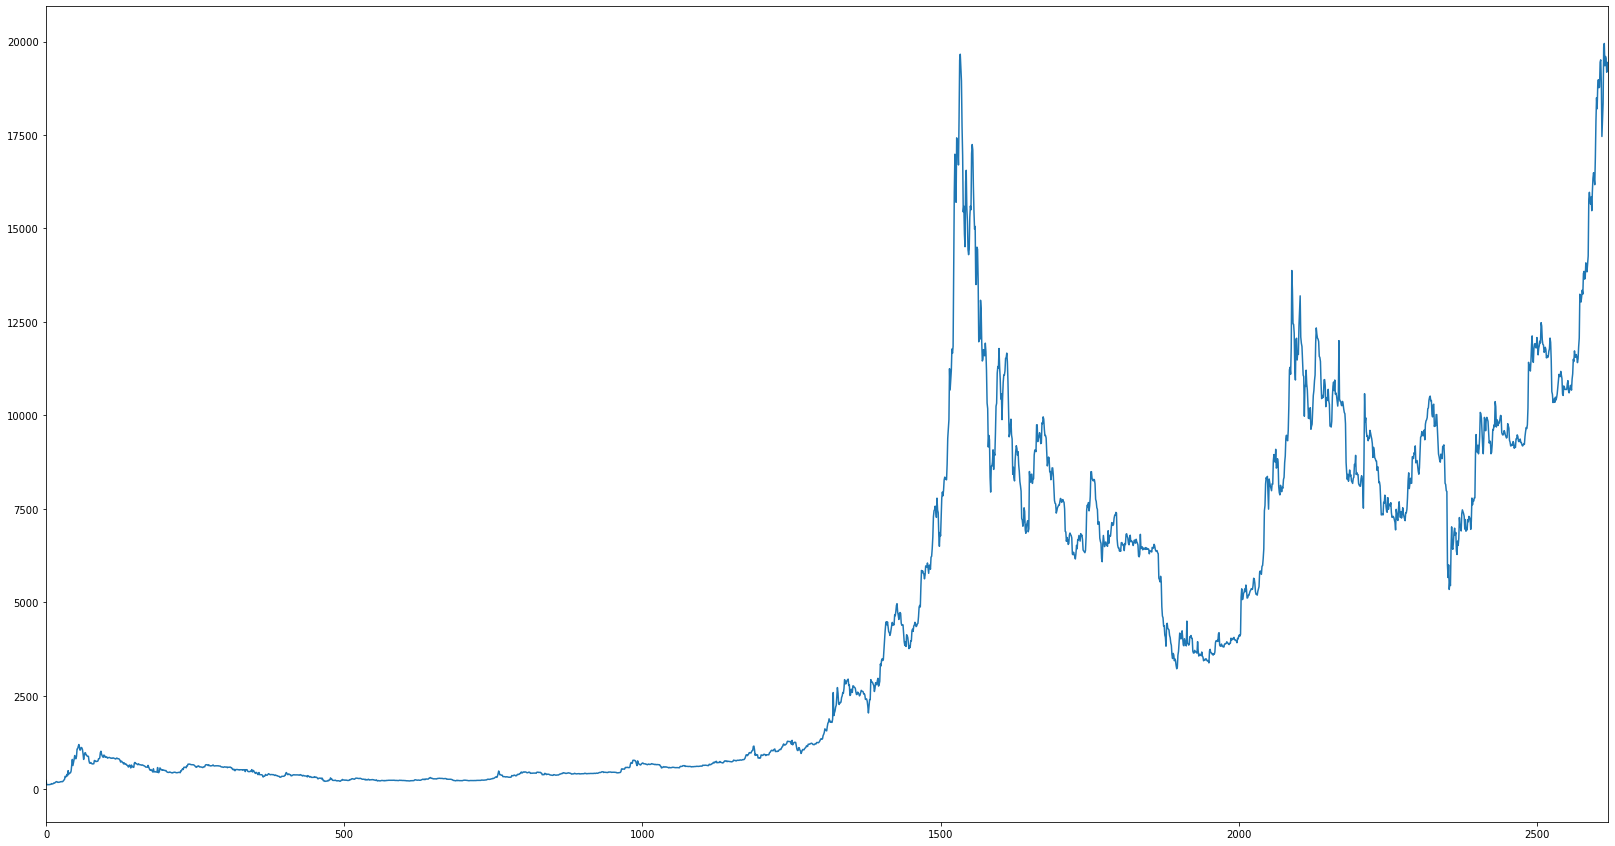

In [68]:
df.high.plot(figsize=(28,15))

<AxesSubplot:xlabel='dow_str'>

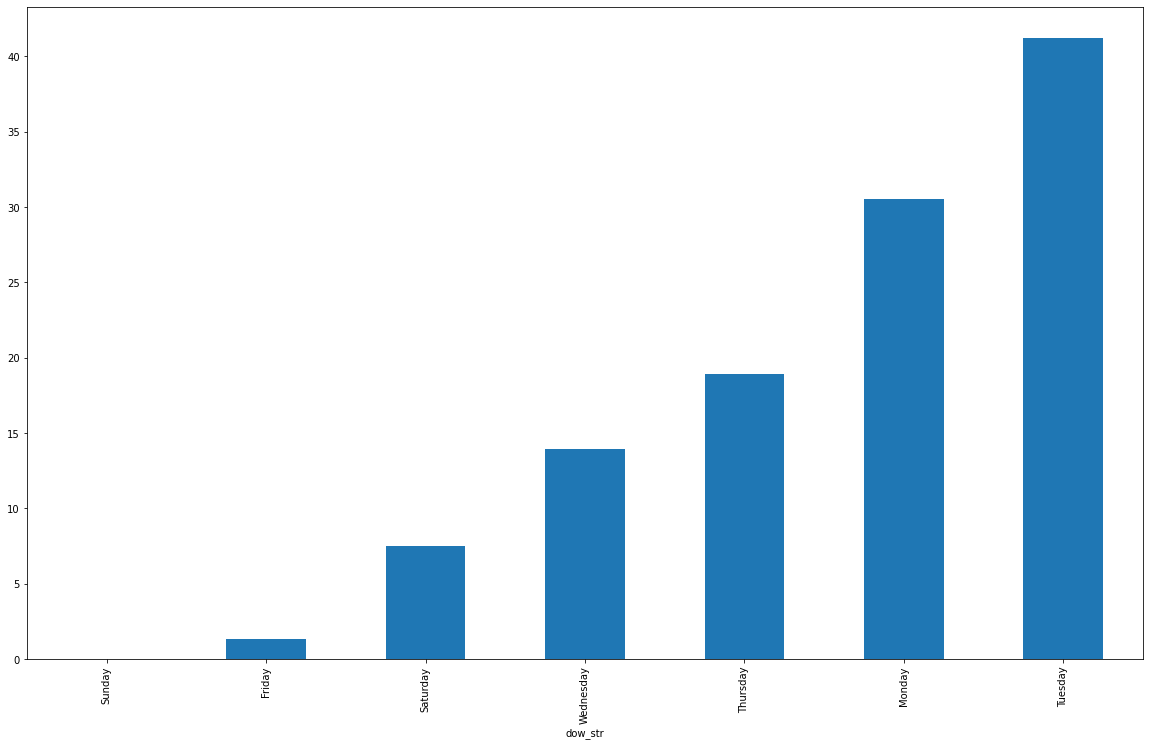

In [69]:
dow = df.groupby(['dow_str']).mean()['high']
dow = dow-dow.min()
dow.sort_values().plot.bar(figsize=(20,12))

<AxesSubplot:xlabel='moy_str'>

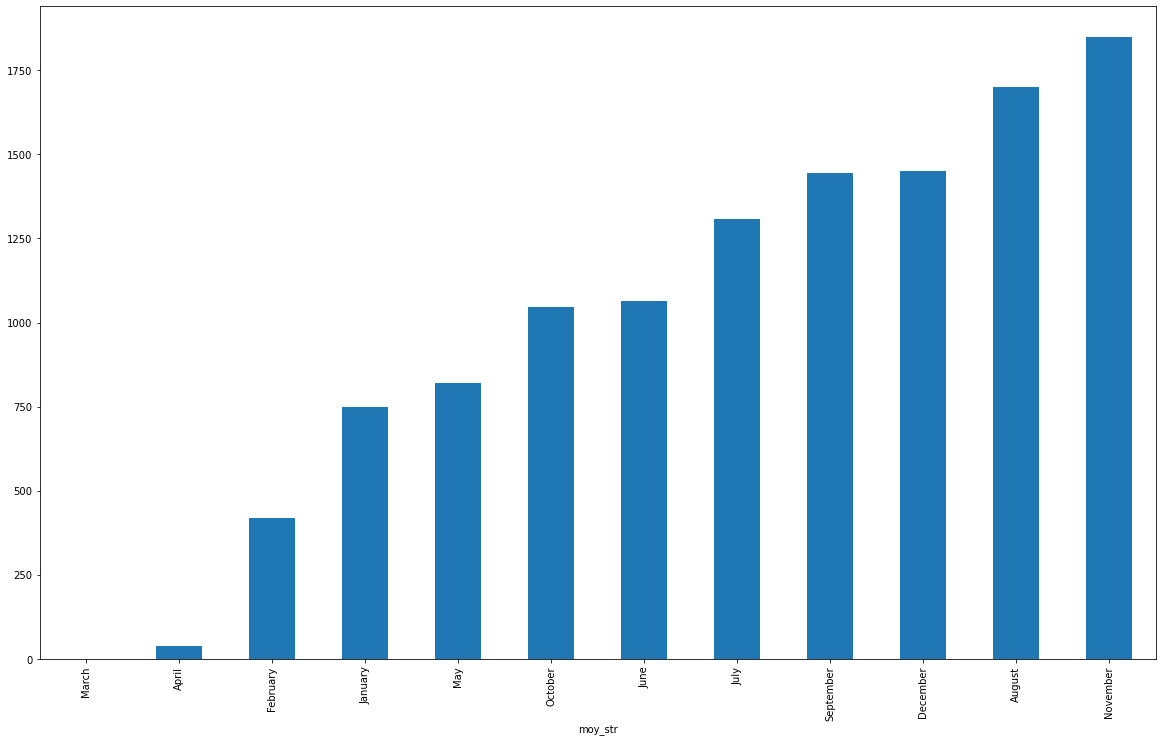

In [70]:
moy = df.groupby(['moy_str']).mean()['high']
moy = moy-moy.min()
moy.sort_values().plot.bar(figsize=(20,12))

In [71]:
#Create the heatmap df
days_in_week = 7
months_in_year = 12

import calendar
day_names = [calendar.day_name[i] for i in range(days_in_week)] 
month_names = [calendar.month_name[i] for i in range(1, 13)] 

tdf = pd.DataFrame(np.zeros((days_in_week, months_in_year)) , index=day_names, columns=month_names )

tdf

,January,February,March,April,May,June,July,August,September,October,November,December
Monday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tuesday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wednesday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Thursday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Friday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Saturday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sunday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
#iterate month columns
for month, weekdays in tdf.iteritems(): 
    #iterate weekday items
    for day, value in weekdays.iteritems():
        #add value to each cell
        tdf.at[day, month] = df[(df.moy_str == month) & (df.dow_str == day)]['high'].mean()

tdf = tdf.astype(int)

In [75]:
tdf

,January,February,March,April,May,June,July,August,September,October,November,December
Monday,4276,3584,3263,3512,3912,4250,4847,4994,4749,4271,5373,4546
Tuesday,4281,3709,3250,3276,4085,4371,4805,4873,4702,4487,4958,4901
Wednesday,4273,3747,3148,3282,4256,4255,4713,4902,4817,4325,5143,4530
Thursday,3957,3699,3375,3446,4301,4169,4540,5165,4591,4351,5319,4544
Friday,3840,3641,3400,3232,4158,4400,4509,5057,4614,4365,5103,4885
Saturday,3803,3910,3340,3163,4016,4625,4375,5059,4769,4425,4963,4849
Sunday,3872,3702,3279,3401,4064,4442,4413,4901,4921,4149,5139,4934


In [76]:
# plt.pcolor(df)
# plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
# plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
# plt.show()

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


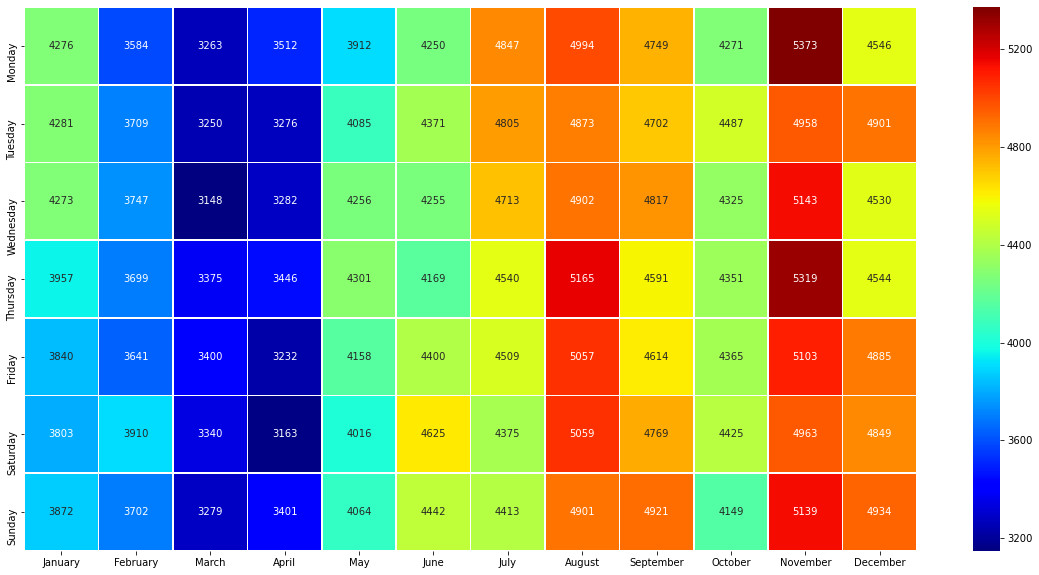

In [78]:
fig, ax = plt.subplots(figsize=(20, 10))
sb.heatmap(tdf, annot=True, fmt="d", linewidths=.5, cmap='jet')
plt.show()

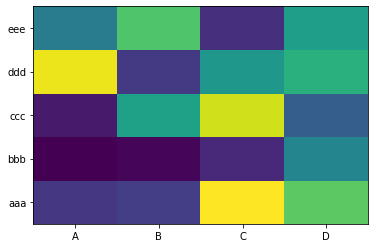

In [267]:
import numpy as np 
from pandas import DataFrame
import matplotlib.pyplot as plt

index = ['aaa', 'bbb', 'ccc', 'ddd', 'eee']
columns = ['A', 'B', 'C', 'D']
df = DataFrame(abs(np.random.randn(5, 4)), index=index, columns=columns)

plt.pcolor(df)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.show()